# Lab-6: Kernel SVM, DNN


_____
##### In this lab, you will experiment with different kernels in SVM and implement PCA step by step.

### Objectives:
1. Explore SVM kernel types
2. Practice DNN in Keras.

## Kernel SVM

1. Why is it called a kernel trick?
<span style="color:blue"> It is when instead of searching hyperplane in the initial space, we are searching it in some higher-dimensional space, where projected points are linearly separable. It is called a trick because we don't actually have to project points to that space - if we know how to compute their inner products there, this is enough => saves a lot of time. </span>

### Most popular kernel types
![alt text](kernel.png "Title")


### Generating data

<ipython-input-2-b3dc0805ae65>:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("131")
<ipython-input-2-b3dc0805ae65>:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("132")
<ipython-input-2-b3dc0805ae65>:25: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("133")


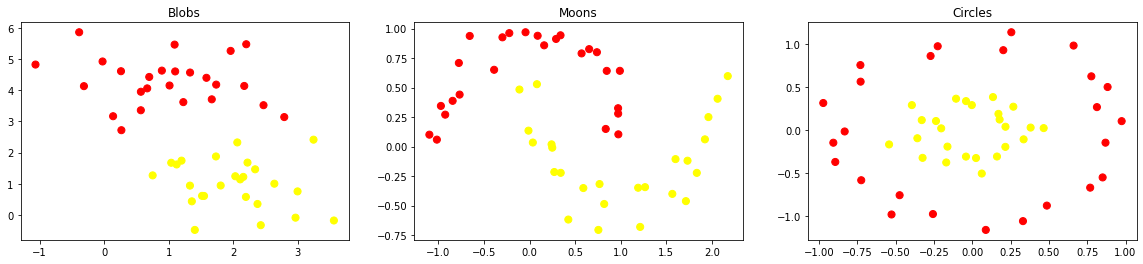

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# here we assign values for constants
n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.subplot("131")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='autumn')
plt.title("Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.subplot("132")
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=50, cmap='autumn')

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.subplot("133")
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='autumn')
plt.show()

In [ ]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

In [ ]:
# test kernels for each dataset
# this is the approximate output you should get for the blobs dataset
# Use the function plot_svc_decision_function



def test_kernels(X, Y):

  # Create model with linear kernel and fit it to X and Y.

  plt.figure(figsize=(20,4))

  linear_model = SVC(kernel='linear')
  linear_model.fit(X, Y)
  plt.subplot("131")
  plt.title("Linear kernel")
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
  plot_svc_decision_function(linear_model)

  rbf_model = SVC(kernel='rbf')
  rbf_model.fit(X, Y)
  plt.subplot("132")
  plt.title("RBF kernel")
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
  plot_svc_decision_function(rbf_model)

  poly_model = SVC(kernel='poly', degree=3)
  poly_model.fit(X, Y)
  plt.subplot("133")
  plt.title("Polynomial kernel")
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
  plot_svc_decision_function(poly_model)
  plt.show()

### Exploring parameters effect
Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.



![alt text](http://cs604525.vk.me/v604525210/afd4/xuJnTRcY43g.jpg)

In [ ]:
# Manually tune parameters for the moons dataset, plotting the result
# Use the plot_svc_decision_function made for you.

def test_kernel(kernel, X, Y, C=1, gamma='scale', degree=3):
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X, Y)
    plt.title(kernel + " kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(model)


In [ ]:
test_kernel('rbf', X_moon, Y_moon, C=20, gamma=1)

In [ ]:
test_kernel('linear', X_moon, Y_moon, C=20, gamma=1)

In [ ]:
test_kernel('poly', X_moon, Y_moon, C=20, gamma=1)

## Deep Neural Nets in Keras

Theoretical issues:

1. What's the difference between deep learning and normal machine learning?
1- Adding more data for traditional ML algorithms, won't improve
	  the performance and the learning curve will saturate (plateau), but for DL, you can get better performance.
	<br/>2- There's no feature extraction step in a lot of cases like in CNN
	<br/>3- It needs high computational power in training.

2. How does a neural network with no hidden layers and one output neuron compare to a logistic/linear regression?
<span style="color:blue"> There's no difference. NN with no hidden layers is perceptron which has the same architecture of logistic/linear regression. If the activation function in the output layer is linear and loss is mse then it is linear regression. If the activation function in the output layer is sigmoid and the loss is the logloss then it is logistic regression.

3. How does a neural network with multiple hidden layers but with linear activation and one output neuron compared to logistic/linear regression?
<span style="color:blue"> Also, there's no difference. Take as an example this image:
![alt text](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-4-19-50-am.png?w=996&h=736)
Derive the output neuron in this simple network, given the activation function is this linear function: f(x) = x, You will find it is a linear combination of the input variables.

4. In multi-hidden layers network, what's the need of non-linear activation function?
<span style="color:blue"> To capture the non linear patterns in the relation between the input and the output.


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from math import sqrt, ceil

Data loading and preprocessing

Task: Flatten the images dataset from (n_samples, width, height) to (n_samples, width * height).

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
train_shape = x_train.shape
test_shape = x_test.shape
print(x_train.shape, x_test.shape)
#Images are 2D. What's the difference in 3D images?
x_train = x_train.reshape(train_shape[0], train_shape[1] * train_shape[2])
x_test = x_test.reshape(test_shape[0], test_shape[1] * test_shape[2])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Some hyperparamters:

In [ ]:
epochs = 50
batch_size = 10
input_size = x_train.shape[1]
num_classes = 10 

Model building

Tasks:

1.   Add 2 more hidden layers with #neurons: 64, 32.
2.   Add Batch normalization after each hidden layer.
3. Add 2 dropout layers after the 2 newly added hidden layers with droping rate = 0.2.

In [ ]:
#Try to change number of units in each layer
#Try to change activation (sigmoid, relu, tanh, linear, selu, .. visit: https://goo.gl/hdtK15
def get_model():
    model = Sequential()

    model.add(Dense(units=128,
                    input_dim=input_size, activation='sigmoid'))

    # Add 2 hidden layers with number of units: 32, 64 
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=64,
                    input_dim=input_size, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(units=32,
                    input_dim=input_size, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Dense(units=num_classes, use_bias=True, activation='softmax'))
    #Try to change the optimizer, visit: https://goo.gl/dHFJNy
    #Try to change the loss func, visit: https://goo.gl/xMrooU
    #Try to change learning rate (lr)
    #In your free time take a look at different variations of GD: https://goo.gl/YFa6XY
    sgd_optimizer = SGD(lr=.01)
    adam_optimizer = Adam(lr=.001)
    model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Training and Evaluation on test set.

Task:

1.   Add validation split to tune all the hyperparamters.
2.   Add Earlystopping callback.
3.   Add Learning Rate scheduler callback.




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

model = get_model()

early_stop = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.3)

model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.15, callbacks=[early_stop, reduce_lr])

loss, acc= model.evaluate(x_test, y_test)
print("Loss:", loss, ", Accuracy:", acc)

Save the wrights of the model in my_model_weights.hdf5

In [ ]:
model.save("my_model.pth")